In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_final313.csv')
df.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [3]:
df.shape

(887379, 30)

In [4]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'home_ownership_cat', 'income_category', 'annual_inc', 'income_cat',
       'loan_amount', 'term', 'term_cat', 'application_type',
       'application_type_cat', 'purpose', 'purpose_cat', 'interest_payments',
       'interest_payment_cat', 'loan_condition', 'loan_condition_cat',
       'interest_rate', 'grade', 'grade_cat', 'dti', 'total_pymnt',
       'total_rec_prncp', 'recoveries', 'installment', 'region'],
      dtype='object')

In [5]:
df.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [6]:
df.loan_condition.value_counts()

Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

In [7]:
df['target'] = df.loan_condition.apply(lambda x: 1 if x == 'Bad Loan' else 0)

In [8]:
df.loan_condition.value_counts()

Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

In [9]:
df3 = df.loc[df['grade'] == 'G']

In [10]:
df3.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,target
223,1060644,2011,01/12/2011,1122012,7.0,MORTGAGE,3,Medium,120000,2,...,23.91,G,7,12.96,22188.25000,18100.00,0.00,519.76,munster,0
540,1062756,2011,01/12/2011,1122015,10.0,RENT,1,Low,61000,1,...,23.52,G,7,11.65,17752.76000,9064.08,0.00,370.38,Northern-Irl,0
602,1058624,2011,01/12/2011,1012014,5.0,RENT,1,Low,40000,1,...,23.13,G,7,20.88,8530.26000,2444.99,1482.67,349.79,leinster,1
618,1061914,2011,01/12/2011,1062015,6.0,RENT,1,Low,85000,1,...,22.74,G,7,7.02,26376.52000,12893.89,0.00,628.13,Northern-Irl,1
735,1060753,2011,01/12/2011,1042015,4.0,RENT,1,Low,60000,1,...,23.91,G,7,17.74,37785.28111,24925.00,0.00,715.75,leinster,0


In [11]:
# Data Visualization
## funcions
def info_feature(feature):
    unique = feature.value_counts()
    percent = feature.value_counts()/len(feature)*100
    print('Count\n',unique)
    print('\nPercent\n',percent)
    
def info_range_feat(feature):
    max = feature.max()
    min = feature.min()
    range = [min,max]
    print('max',max)
    print('min',min)
    print('range', range)
    return
    
def outlier(feature):
    Q1 = np.percentile(feature, 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(feature, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
  # Upper bound
    upper = np.where(feature >= (Q3+1.5*IQR))
  # Lower bound
    lower = np.where(feature <= (Q1-1.5*IQR))
    return sns.boxplot(feature)

def plot(feat,t):
    plt.subplots(figsize =(10, 6))
    sns.countplot(data = df, y = feat)
    plt.title(t)
    plt.show()
    
def plot_feat(str_feat):
    f,ax=plt.subplots(1,2,figsize=(18,8))
    df[str_feat].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(str_feat)
    ax[0].set_ylabel('')
    sns.countplot(str_feat,data=df,ax=ax[1])
    ax[1].set_title(str_feat)
    plt.show()

#group data
def bin_(str_feat, bins):
    df[str_feat] = pd.cut(df[str_feat], bins = np.linspace(df[str_feat].min(), df[str_feat].max(), num = bins))
    df[str_feat].value_counts()
    
#Mối quan hệ với target
def feat_target(str_feat,f):
    feat_target = pd.pivot_table(df,values=str_feat,index=f,columns='target',aggfunc=len)
    perc_target = df[[str_feat, 'target']].groupby([str_feat],as_index=False).mean()
    perc_target = pd.DataFrame(perc_target)
    perc_target = perc_target.rename(columns = {'target':'1'})
    perc_target['0'] = 1 - perc_target['1']
    perc_target = perc_target[[str_feat,'0','1']]

    print('Number of default and non-default\n',feat_target)
    print('\nPercent of default and non-default per attribute\n', perc_target)
    return  

target_count = df['target'].value_counts()
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    target_count = df[feature].value_counts()
    df1 = pd.DataFrame({feature: target_count.index,'Number of contracts': target_count.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'target']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='target', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();


# Loan condition

Count
 Good Loan    819950
Bad Loan      67429
Name: loan_condition, dtype: int64

Percent
 Good Loan    92.40133
Bad Loan      7.59867
Name: loan_condition, dtype: float64


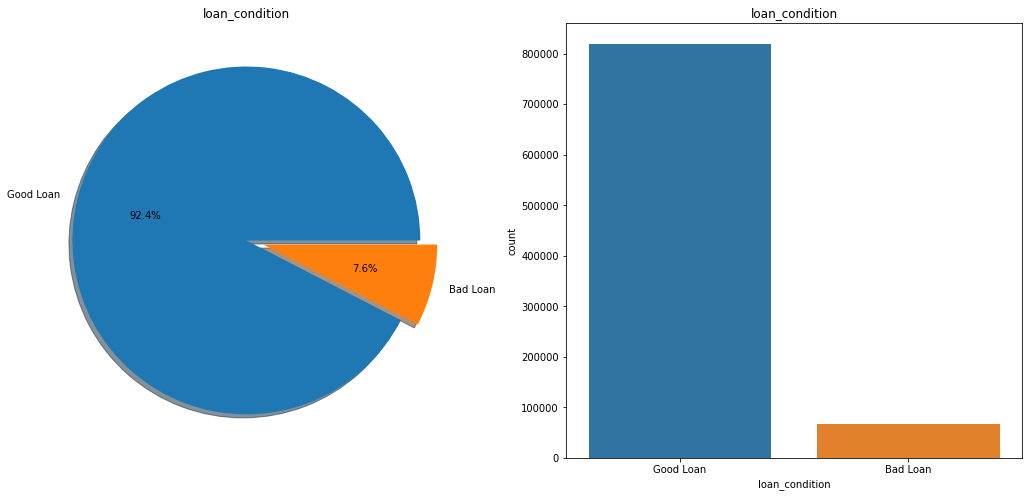

In [12]:
#Loan condition
info_feature(df.loan_condition)
plot_feat('loan_condition')
# => Imbalanced Data

The customer's debt condition dataset has 92.4% Good Loans and only 7.6% Bad Loans.
=> Dataset is a imbalance data.

# Year

In [13]:
info_feature(df.year)

Count
 2015    421094
2014    235628
2013    134755
2012     53367
2011     21721
2010     12537
2009      5281
2008      2393
2007       603
Name: year, dtype: int64

Percent
 2015    47.453681
2014    26.553254
2013    15.185732
2012     6.014003
2011     2.447770
2010     1.412812
2009     0.595123
2008     0.269671
2007     0.067953
Name: year, dtype: float64


In [14]:
feat_target('year', df.year)

Number of default and non-default
 target       0      1
year                 
2007       445    158
2008      1897    496
2009      4558    723
2010     10776   1761
2011     18423   3298
2012     44923   8444
2013    116660  18095
2014    213271  22357
2015    408997  12097

Percent of default and non-default per attribute
    year         0         1
0  2007  0.737977  0.262023
1  2008  0.792729  0.207271
2  2009  0.863094  0.136906
3  2010  0.859536  0.140464
4  2011  0.848165  0.151835
5  2012  0.841775  0.158225
6  2013  0.865719  0.134281
7  2014  0.905117  0.094883
8  2015  0.971272  0.028728


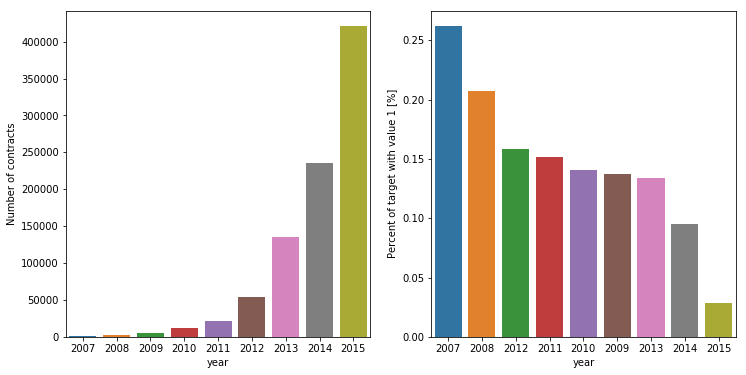

In [15]:
plot_stats('year')

The borrowers were mainly in 2013 and beyond, when the economy had stabilized. In the years 2007-2011, very few people applied for loans, especially in the period 2007-2009 - the period when the economic crisis occurred.
It can be seen the effect of that period on the customer's debt status more clearly in the chart of the customer's bad debt ratio year by year. Bad Loan rate was highest in 2007 (more than 25%), then in 2008 (>20%), and Bad Loan rate will decrease gradually in the following years.

# Employment length

In [16]:
info_feature(df.emp_length_int)

Count
 10.00    291569
2.00      78870
0.50      70605
3.00      70026
1.00      57095
5.00      55704
4.00      52529
6.05      44825
7.00      44594
8.00      43955
6.00      42950
9.00      34657
Name: emp_length_int, dtype: int64

Percent
 10.00    32.857325
2.00      8.887972
0.50      7.956578
3.00      7.891329
1.00      6.434117
5.00      6.277363
4.00      5.919568
6.05      5.051393
7.00      5.025361
8.00      4.953351
6.00      4.840097
9.00      3.905547
Name: emp_length_int, dtype: float64


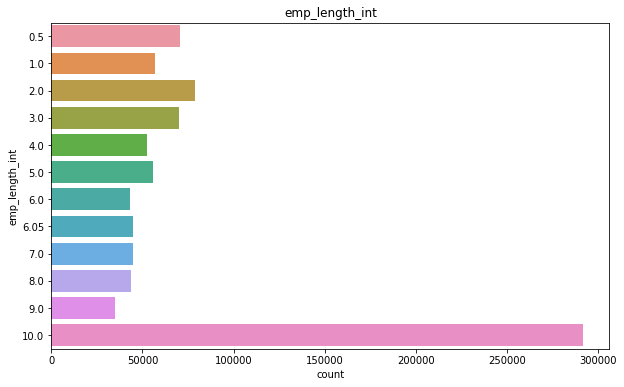

In [17]:
plot(df.emp_length_int,'emp_length_int')

The customer's working time for the most recent job. The person doing the current job for at least half a year and at most 10 years. From the data, we can see that the majority of customers when taking out a loan have been doing their current job for 10 years (accounting for 32.85% of the total number of customers).

# Home Ownership

In [18]:
info_feature(df.home_ownership)

Count
 MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

Percent
 MORTGAGE    49.985068
RENT        40.131331
OWN          9.857119
OTHER        0.020510
NONE         0.005635
ANY          0.000338
Name: home_ownership, dtype: float64


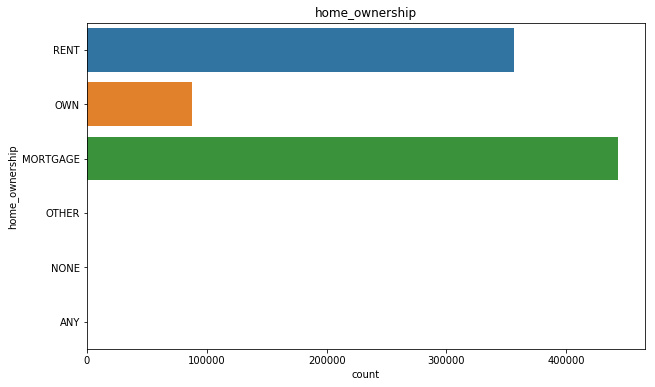

In [19]:
plot(df.home_ownership,'home_ownership')

Number of default and non-default
 target                 0        1
home_ownership                   
ANY                  3.0      NaN
MORTGAGE        413858.0  29699.0
NONE                42.0      8.0
OTHER              144.0     38.0
OWN              81177.0   6293.0
RENT            324726.0  31391.0

Percent of default and non-default per attribute
   home_ownership         0         1
0            ANY  1.000000  0.000000
1       MORTGAGE  0.933044  0.066956
2           NONE  0.840000  0.160000
3          OTHER  0.791209  0.208791
4            OWN  0.928055  0.071945
5           RENT  0.911852  0.088148


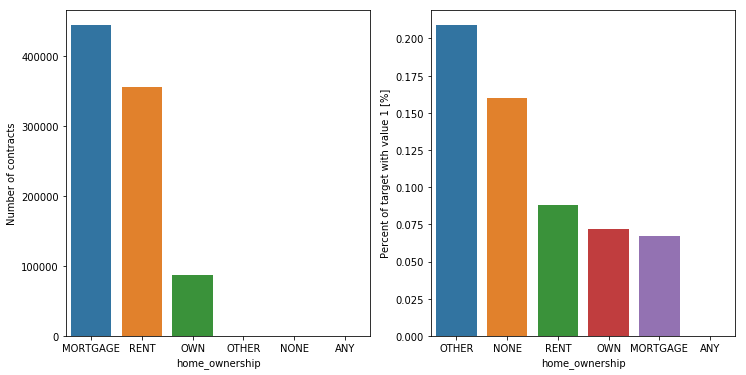

In [20]:
feat_target('home_ownership', df.home_ownership)
plot_stats('home_ownership')

The home ownership status feature provided by the borrower upon registration has six different status categories: rent, own, mortgage, other, none, any. None and any account for quite a small amount, this can happen while filling in information, customers or employees have made this data error. Thus processing: merging two data into one.
As can be seen the chart Home Ownership (%), it is clear that customers are mainly living in rented houses (40.13%) or in installments (49.98%), and the number of customers owning their own houses is much less with 9.86% of the total number of customers.
As can be seen the chart Home Ownership (% Bad Loan), although the bad loan rate of other and none is not high, compared to other values in the feature, it is much higher (0.2% and 0.19%).

# Income category

In [21]:
info_feature(df.income_category)

Count
 Low       729616
Medium    140977
High       16786
Name: income_category, dtype: int64

Percent
 Low       82.221463
Medium    15.886898
High       1.891638
Name: income_category, dtype: float64


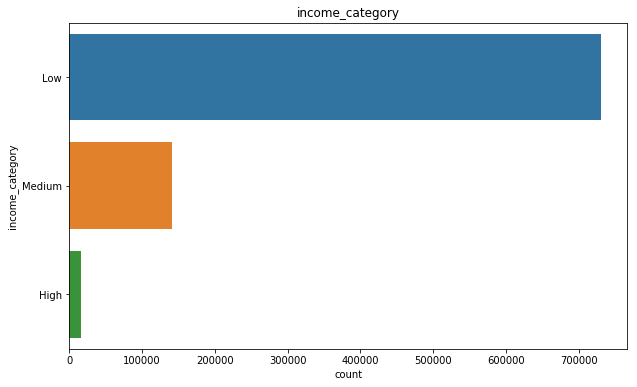

In [22]:
plot(df.income_category,'income_category')

In [23]:
feat_target('income_category',df.income_category)

Number of default and non-default
 target                0      1
income_category               
High              15978    808
Low              670751  58865
Medium           133221   7756

Percent of default and non-default per attribute
   income_category         0         1
0            High  0.951865  0.048135
1             Low  0.919321  0.080679
2          Medium  0.944984  0.055016


The chart shows that almost customers who borrow from banks have low income (accounting for 82.22%) of the total number of customers. Middle-income customers account for 15.89% and the number of high-income customers is very low (only 1.89% ~ 16786 customers).
•	Customers with low income from 100000 down.
•	Customers have an average income of 200000 or less.
•	Customers with high income over 200000 - 950000.
The second chart shows the trends in customer income and Bad Loan rates. The higher the customer's income, the lower the Bad Loan rate.


Number of default and non-default
 target                 0        1
home_ownership                   
ANY                  3.0      NaN
MORTGAGE        413858.0  29699.0
NONE                42.0      8.0
OTHER              144.0     38.0
OWN              81177.0   6293.0
RENT            324726.0  31391.0

Percent of default and non-default per attribute
   income_category         0         1
0            High  0.951865  0.048135
1             Low  0.919321  0.080679
2          Medium  0.944984  0.055016


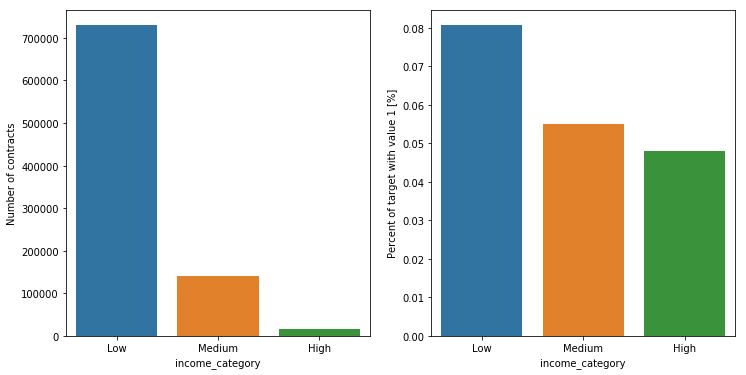

In [24]:
feat_target('income_category', df.home_ownership)
plot_stats('income_category')

# Term

In [25]:
info_feature(df.term)

Count
  36 months    621125
 60 months    266254
Name: term, dtype: int64

Percent
  36 months    69.995459
 60 months    30.004541
Name: term, dtype: float64


In [26]:
feat_target('term',df.term)

Number of default and non-default
 target           0      1
term                     
 36 months  578194  42931
 60 months  241756  24498

Percent of default and non-default per attribute
          term         0         1
0   36 months  0.930882  0.069118
1   60 months  0.907990  0.092010


In [27]:
pd.crosstab(df.term,df.loan_condition,margins=True).style.background_gradient(cmap='summer_r')

loan_condition,Bad Loan,Good Loan,All
term,,,
36 months,42931,578194,621125
60 months,24498,241756,266254
All,67429,819950,887379


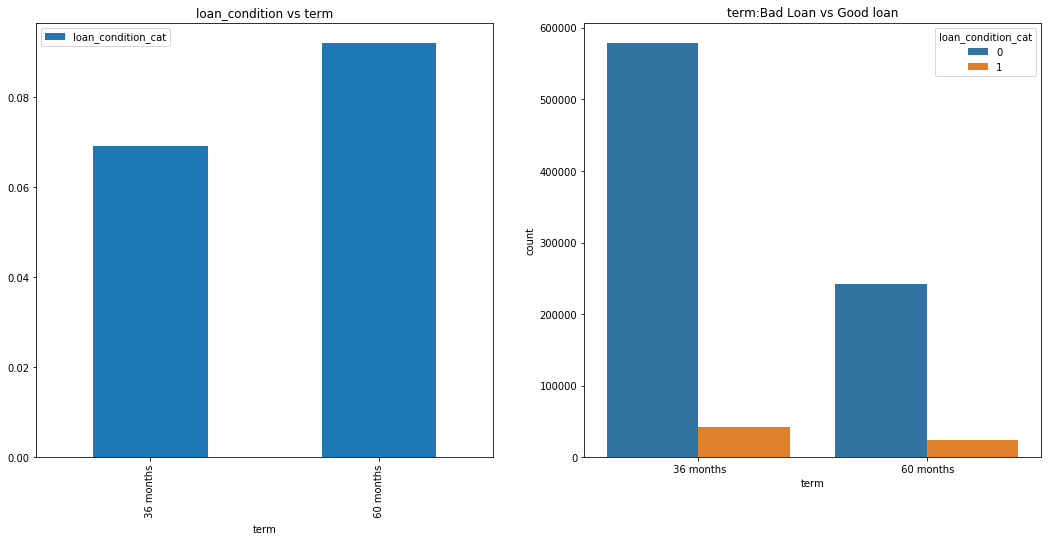

In [28]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['term','loan_condition_cat']].groupby(['term']).mean().plot.bar(ax=ax[0])
ax[0].set_title('loan_condition vs term')
sns.countplot('term',hue='loan_condition_cat',data=df,ax=ax[1])
ax[1].set_title('term:Bad Loan vs Good loan')
plt.show()

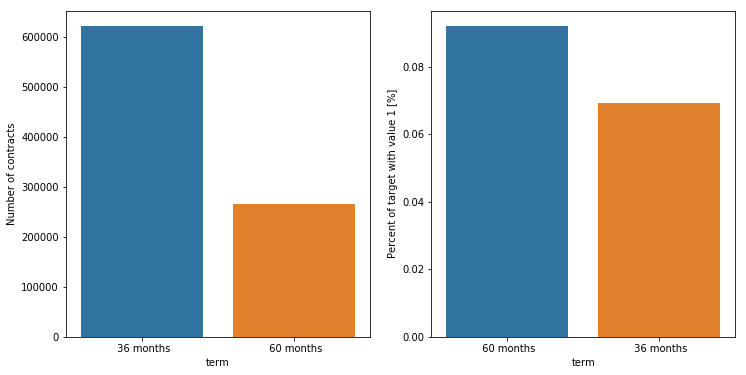

In [29]:
plot_stats('term',False,True)

When borrowing from a bank, there are two repayment periods: 60 months and 36 months.
Customers mainly borrow with a term of 36 months, the number of borrowers with a term of 36 months (accounting for 70% of total customers) is more than double the number of borrowers with a term of 60 months (accounting for 30% of total customers). However, the Bad Loan rate for customers who borrow within 60 months is higher than that for customers who borrow within 36 months.
It is possible that a longer loan period results in a lower repayment capacity.


# Application_type

In [30]:
info_feature(df.application_type)

Count
 INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64

Percent
 INDIVIDUAL    99.942415
JOINT          0.057585
Name: application_type, dtype: float64


In [31]:
pd.crosstab(df.application_type,df.loan_condition,margins=True).style.background_gradient(cmap='summer_r')

loan_condition,Bad Loan,Good Loan,All
application_type,,,
INDIVIDUAL,67424,819444,886868
JOINT,5,506,511
All,67429,819950,887379


In [32]:
feat_target('application_type',df.application_type)

Number of default and non-default
 target                 0      1
application_type               
INDIVIDUAL        819444  67424
JOINT                506      5

Percent of default and non-default per attribute
   application_type         0         1
0       INDIVIDUAL  0.923975  0.076025
1            JOINT  0.990215  0.009785


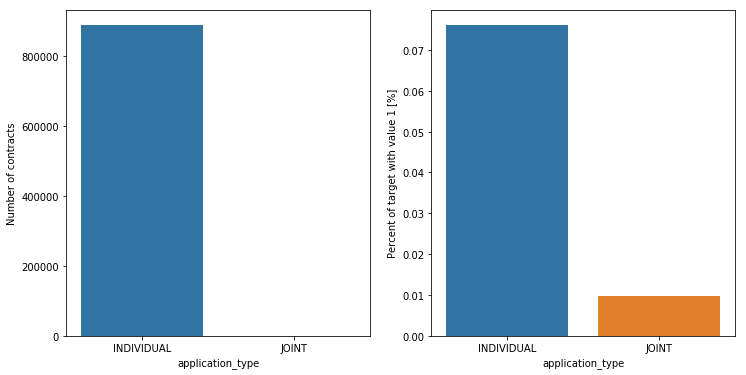

In [33]:
plot_stats('application_type',False,True)

Borrowers are mostly individual borrowers, very few customers apply for loans with other people (0.06% of total customers - 511 people).
This is also reasonable when the percentage of Bad Loan customers with personal loans (0.07%) is much higher than when applying for loans with other people (0.0098%).

# Purpose

In [34]:
info_feature(df.purpose)

Count
 debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

Percent
 debt_consolidation    59.074533
credit_card           23.234942
home_improvement       5.840684
other                  4.833786
major_purchase         1.946970
small_business         1.169399
car                    0.998784
medical                0.962385
moving                 0.610111
vacation               0.533707
house                  0.417747
wedding                0.264487
renewable_energy       0.064798
educational            0.047668
Name: purpose, dtype: float64


In [35]:
pd.crosstab(df.purpose,df.loan_condition,margins=True).style.background_gradient(cmap='summer_r')

loan_condition,Bad Loan,Good Loan,All
purpose,,,
car,596,8267,8863
credit_card,11755,194427,206182
debt_consolidation,41608,482607,524215
educational,88,335,423
home_improvement,3553,48276,51829
house,417,3290,3707
major_purchase,1294,15983,17277
medical,804,7736,8540
moving,607,4807,5414


In [36]:
feat_target('purpose',df.purpose)

Number of default and non-default
 target                   0      1
purpose                          
car                   8267    596
credit_card         194427  11755
debt_consolidation  482607  41608
educational            335     88
home_improvement     48276   3553
house                 3290    417
major_purchase       15983   1294
medical               7736    804
moving                4807    607
other                38731   4163
renewable_energy       503     72
small_business        8596   1781
vacation              4334    402
wedding               2058    289

Percent of default and non-default per attribute
                purpose         0         1
0                  car  0.932754  0.067246
1          credit_card  0.942987  0.057013
2   debt_consolidation  0.920628  0.079372
3          educational  0.791962  0.208038
4     home_improvement  0.931448  0.068552
5                house  0.887510  0.112490
6       major_purchase  0.925103  0.074897
7              medical  0.

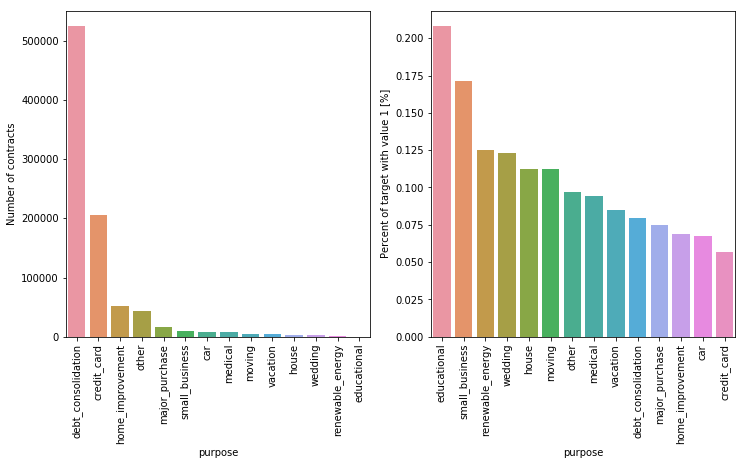

In [37]:
plot_stats('purpose',True,True)

There are 14 different reasons (including other options) customers apply for a loan, in which customers apply with the most for the purpose of debt consolidation (Up to 59% of the total customers). Next, Credit Card is also the purpose of many customers to register (accounting for 23.23% of customers).
The two purposes that customers mention the least are renewable energy (0.065%) and educational (0.047%).
Although the fewest people borrow money for educational spending, the percentage of bad loans is the largest (0.2%), which is much larger than for debt consolidation borrowers (although the top number of borrowers - more 59% but Bad Loan rate is only 0.08%).
Bad Loan rate ranks second when customers borrow for small businesses (0.17%), it is possible to hypothesize that the business is not profitable, difficult times => high Bad Loan rate (considering the loan purpose with five years). get a loan).
Customers who use credit cards have the lowest Bad Loan rate (0.06%), because when issuing a credit card the bank has managed how much monthly income, how much income they can open an account with much => lowest Bad Loan rate.


# Interest payments - Interest rate

In [38]:
info_feature(df.interest_payments)

Count
 Low     465316
High    422063
Name: interest_payments, dtype: int64

Percent
 Low     52.437121
High    47.562879
Name: interest_payments, dtype: float64


In [39]:
feat_target('interest_payments',df.interest_payments)

Number of default and non-default
 target                  0      1
interest_payments               
High               373491  48572
Low                446459  18857

Percent of default and non-default per attribute
   interest_payments         0         1
0              High  0.884918  0.115082
1               Low  0.959475  0.040525


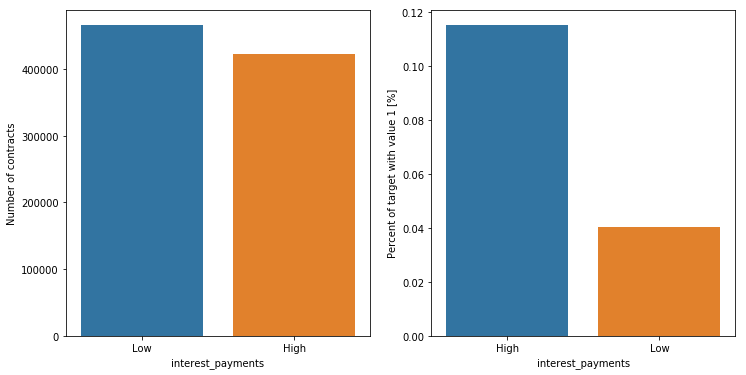

In [40]:
plot_stats('interest_payments')

The number of customers borrowing with high and low interest rates is not much different.
But the Bad Loan rate of borrowers with high interest rates is much higher (0.11) than customers with low interest rates (0.04) (This is reasonable, because when borrowing with high interest rates, the amount must be pay a lot more => customers can't afford to pay => Bad Loan rate is high).


In [41]:
df.interest_rate.describe()

count    887379.000000
mean         13.246740
std           4.381867
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: interest_rate, dtype: float64

Number of default and non-default
 target              0      1
interest_rate               
(5.32, 13.21]  436455  18774
(13.21, 21.1]  340853  40213
(21.1, 28.99]   33012   8421

Percent of default and non-default per attribute
    interest_rate         0         1
0  (5.32, 13.21]  0.958759  0.041241
1  (13.21, 21.1]  0.894472  0.105528
2  (21.1, 28.99]  0.796756  0.203244


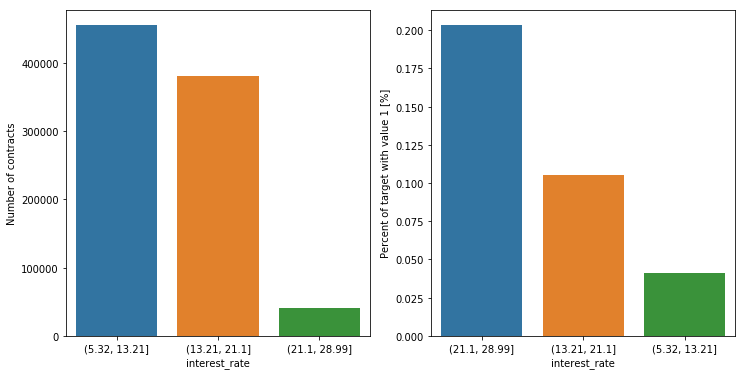

In [42]:
#Tính phần interest_rate thuộc cao, thấp.
bin_('interest_rate', 4)
feat_target('interest_rate', df.interest_rate)
plot_stats('interest_rate')

In [43]:
info_feature(df.interest_rate)

Count
 (5.32, 13.21]    455229
(13.21, 21.1]    381066
(21.1, 28.99]     41433
Name: interest_rate, dtype: int64

Percent
 (5.32, 13.21]    51.300403
(13.21, 21.1]    42.942869
(21.1, 28.99]     4.669144
Name: interest_rate, dtype: float64


Interest_rate Low: 5.32 - < 13.21
Interest_rate High: > 13.21 - 28.99

# Grade

In [44]:
info_feature(df.grade)

Count
 B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

Percent
 B    28.683911
C    27.706313
A    16.701094
D    15.725186
E     7.967847
F     2.597086
G     0.618563
Name: grade, dtype: float64


In [45]:
feat_target('grade', df.grade)

Number of default and non-default
 target       0      1
grade                
A       144539   3663
B       241079  13456
C       226806  19054
D       123683  15859
E        60960   9745
F        18663   4383
G         4220   1269

Percent of default and non-default per attribute
   grade         0         1
0     A  0.975284  0.024716
1     B  0.947135  0.052865
2     C  0.922501  0.077499
3     D  0.886350  0.113650
4     E  0.862174  0.137826
5     F  0.809815  0.190185
6     G  0.768810  0.231190


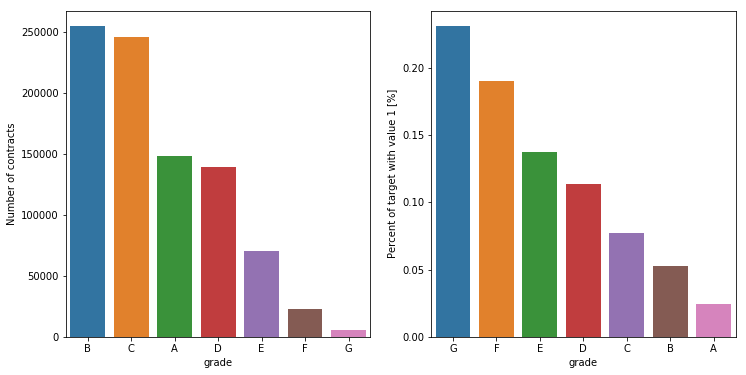

In [46]:
plot_stats('grade')

Customers are mainly in Grade B (28.68%), and Grade C (27%), customers of Grade G and F are very few (accounting for 3%).
Looking at the chart of Bad Loan rate of customers in different grades follows the trend: the higher the customer rank, the lower the rate of Bad Loan. (Grade A Bad Loan rate: 0.024%, Grade G Bad Loan rate: 0.23%).


# Loan

In [64]:
df.loan_amount.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amount, dtype: float64

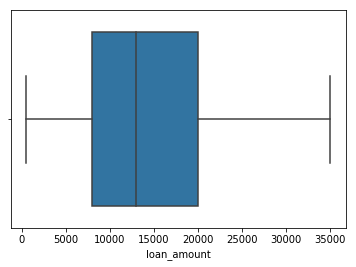

In [65]:
outlier(df.loan_amount)

# Total payment

In [47]:
df.total_pymnt.describe()

count    887379.000000
mean       7558.826684
std        7871.243336
min           0.000000
25%        1914.590000
50%        4894.999117
75%       10616.814230
max       57777.579870
Name: total_pymnt, dtype: float64

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


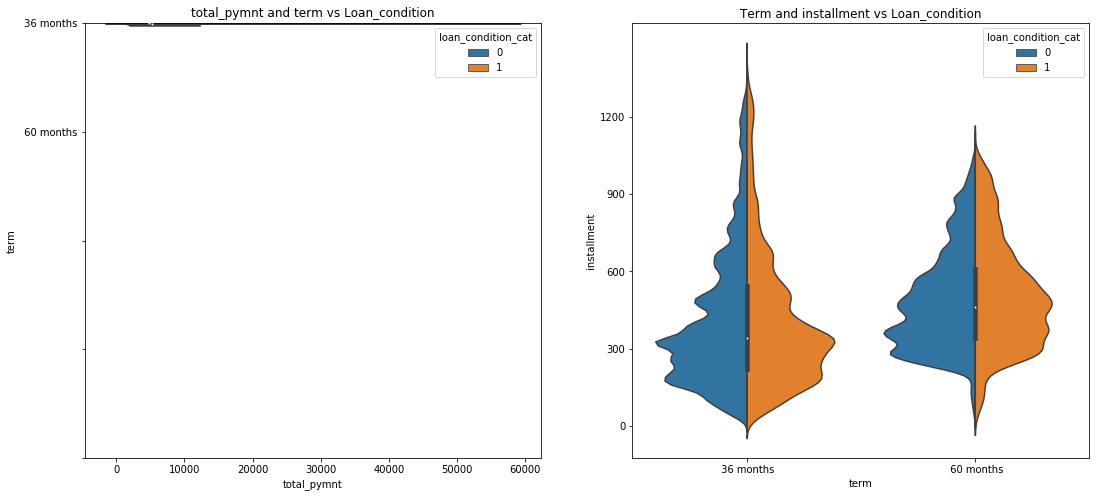

In [48]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("total_pymnt","term", hue="loan_condition_cat", data=df,split=True,ax=ax[0])
ax[0].set_title('total_pymnt and term vs Loan_condition')
ax[0].set_yticks(range(0,1500,300))
sns.violinplot("term","installment", hue="loan_condition_cat", data=df,split=True,ax=ax[1])
ax[1].set_title('Term and installment vs Loan_condition')
ax[1].set_yticks(range(0,1500,300))
plt.show()

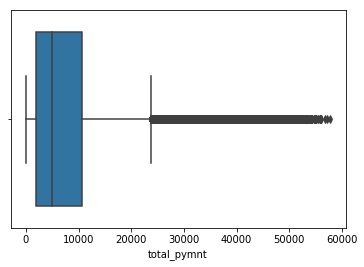

In [67]:
outlier(df.total_pymnt)

# Total_rec_prncp

In [49]:
df.total_rec_prncp.describe()

count    887379.000000
mean       5757.706424
std        6625.441046
min           0.000000
25%        1200.570000
50%        3215.320000
75%        8000.000000
max       35000.030000
Name: total_rec_prncp, dtype: float64

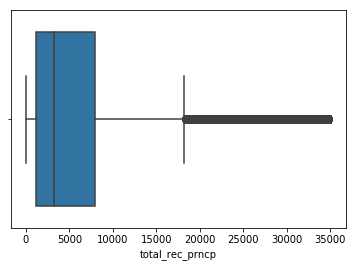

In [56]:
outlier(df.total_rec_prncp)

# Recoveries

In [50]:
df.recoveries.describe()

count    887379.000000
mean         45.919243
std         409.693874
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64

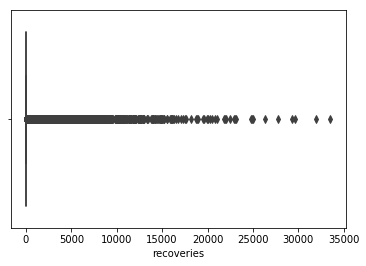

In [57]:
outlier(df.recoveries)

# Installment (số tiền trả góp hàng tháng)

In [51]:
df.installment.describe()

count    887379.000000
mean        436.717127
std         244.186593
min          15.670000
25%         260.705000
50%         382.550000
75%         572.600000
max        1445.460000
Name: installment, dtype: float64

Number of default and non-default
 target                   0      1
installment                      
(15.67, 492.267]    540278  42934
(492.267, 968.863]  250295  21667
(968.863, 1445.46]   29376   2828

Percent of default and non-default per attribute
           installment         0         1
0    (15.67, 492.267]  0.926384  0.073616
1  (492.267, 968.863]  0.920331  0.079669
2  (968.863, 1445.46]  0.912185  0.087815


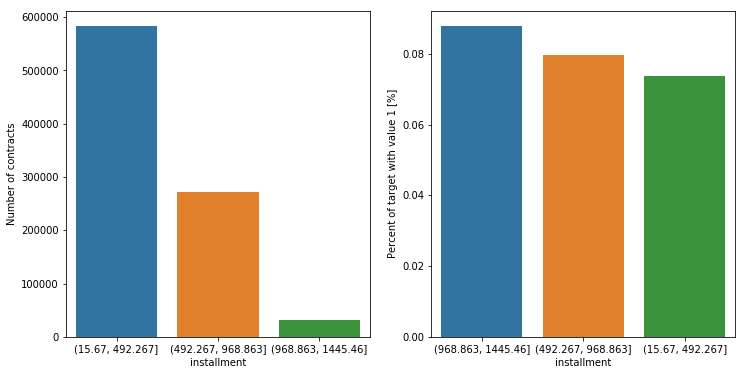

In [52]:
bin_('installment',4)
feat_target('installment',df.installment)
plot_stats('installment')


Looking at the chart, the Bad Loan rate tends to: with the higher the monthly installment amount, the higher the Bad Loan rate (this is consistent with interest rate: high and low interest rates).

# Region

In [53]:
info_feature(df.region)

Count
 leinster        214646
ulster          208731
Northern-Irl    204399
cannught        155029
munster         104574
Name: region, dtype: int64

Percent
 leinster        24.188763
ulster          23.522193
Northern-Irl    23.034014
cannught        17.470438
munster         11.784593
Name: region, dtype: float64


Number of default and non-default
 target             0      1
region                     
Northern-Irl  188266  16133
cannught      144251  10778
leinster      197967  16679
munster        97167   7407
ulster        192299  16432

Percent of default and non-default per attribute
          region         0         1
0  Northern-Irl  0.921071  0.078929
1      cannught  0.930478  0.069522
2      leinster  0.922295  0.077705
3       munster  0.929170  0.070830
4        ulster  0.921277  0.078723


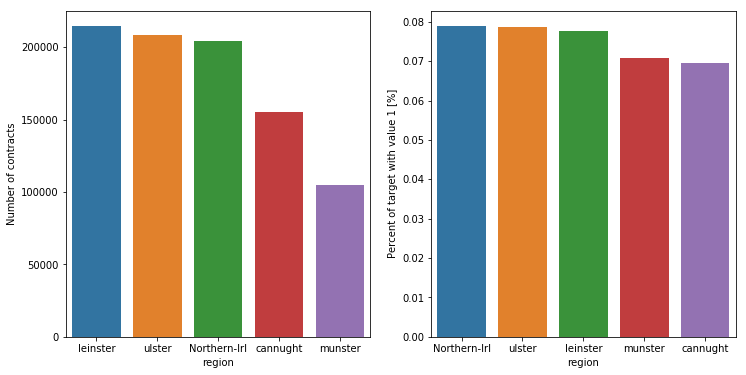

In [54]:
feat_target('region', df.region)
plot_stats('region')

Customers are almost evenly distributed in 5 regions: Leinster, Ulster, Northern-Iri, Cannught, Munster. The rate of Bad Loan in these areas is almost the same and is very small (<0.08%). Therefore, the living area does not affect the Debt Status of the customer.